In [1]:
using Plots

# Adaptive immune response

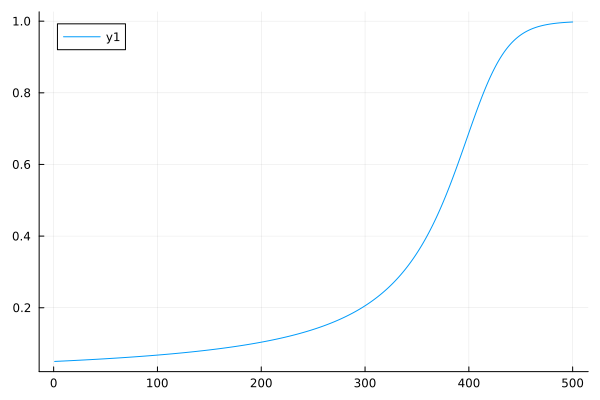

In [2]:
dat = Float64[]
x = 0.05 
eps = 0.014
for i in 1:500
    x += eps * (1.0 -x) * (2*x)^2
    push!(dat, x)
end

plot(dat)

# Disease dynamics

In [3]:
using Random

In [4]:
using Plots

In [5]:
include("main_util.jl")
include("src/varfac_city_model.jl")

step! (generic function with 1 method)

In [16]:
argv = split("--seed 3 --p-inf-base 0.0 --max-prob-mut 0.00001 --base-prob-mut 0.00001 --mutate-dist 0.001")
(pars,), args = load_parameters(argv, AllParams)
pars

AllParams(35040, 3, 60, 15, "", "", 100, 100, 2.5, 0.17, 30, 10, 50, 50, 0.005, 15.0, 5, 100, 5, 10, false, 3.0, 20, 0.01, 0.0, 0.005208333333333333, 0.001488095238095238, 0.9, 0.25, [60, 300], [0.0, 1.0], [0.0, 1.0], 0.05, [0.0, 1.0], 1439, 0.05, 0.2, 0.1, 0.05, 1.0, 2.0, 1.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.3, 1, 1439, 3.0, 0.1, 10, 0.5, 0.001, 19200.0, 0.05, 0.014, 5.208333333333334e-5, 0.1, 0.7, 0.01, 0.015, 3.0, 0.1, 1.0, 3.0, 0.1, 1.0e-5, 1.0e-5, 0.001)

In [24]:
Random.seed!(pars.seed)
model = setup_model(pars)
inf_pop = filter(infected, model.world.pop);
length(inf_pop)

creating 19149 agents


10

In [25]:
imm_str = [Float64[] for i in 1:length(inf_pop)]
nimm = [Float64[] for i in 1:length(inf_pop)]
nvir = [Float64[] for i in 1:length(inf_pop)]
health = [Float64[] for i in 1:length(inf_pop)]

for i in 1:4*24*7
    step!(model, pars)
    for (j,a) in enumerate(inf_pop)
        push!(imm_str[j], (isempty(a.immune.immunities) ? 0.0 : a.immune.immunities[end].strength))
        push!(nvir[j], length(a.viruses))
        push!(nimm[j], length(a.immune.immunities))
        push!(health[j], a.health)
    end
end

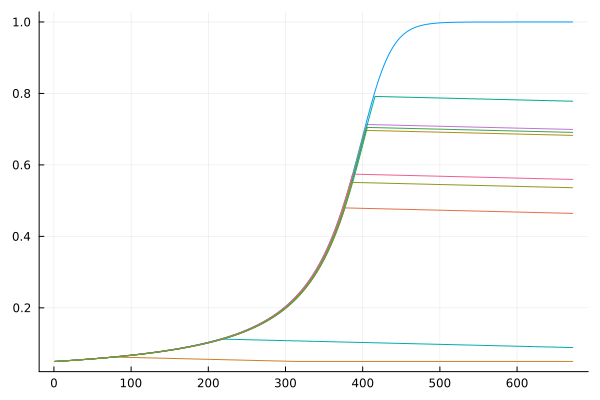

In [26]:
plot(imm_str, label = "")

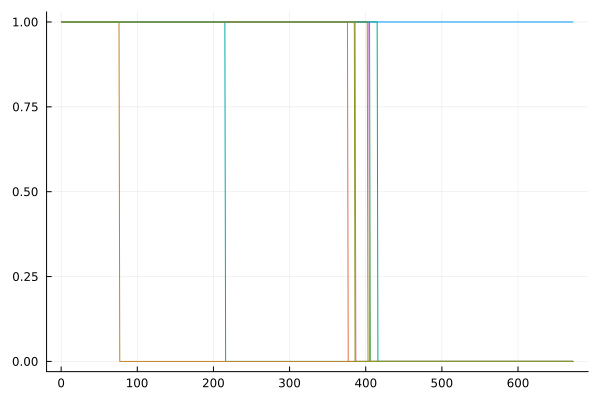

In [27]:
plot(nvir, label = "")

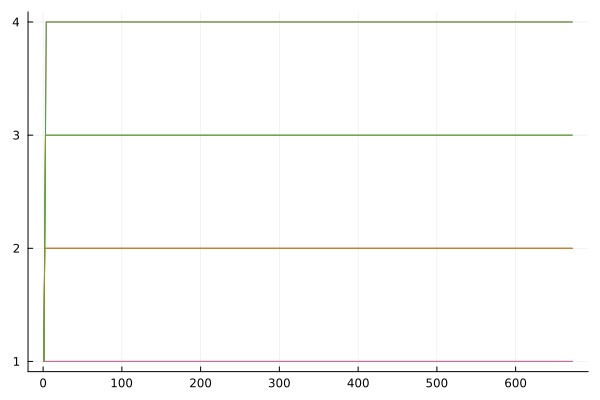

In [28]:
plot(nimm, label = "")

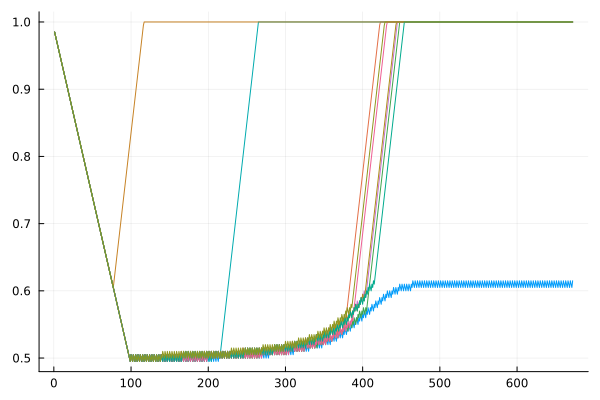

In [29]:
plot(health, label = "")

In [15]:
Random.seed!(pars.seed)
model2 = setup_model(pars)
inf_pop = filter(infected, model2.world.pop);
length(inf_pop)

creating 19149 agents


10